## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [2]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [3]:
# Specify the folder and read in the subfolders.
reviews = load_files(r'txt_sentoken/txt_sentoken',shuffle=True, encoding="utf-8")
my_docs, y = reviews.data, reviews.target

In [4]:
len(my_docs)

2000

In [5]:
my_docs

["arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \r\nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \r\nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \r\nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \r\nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \r\nparts of this are actually so absurd , that they would fit right in with dogma . \r\nyes , 

In [6]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

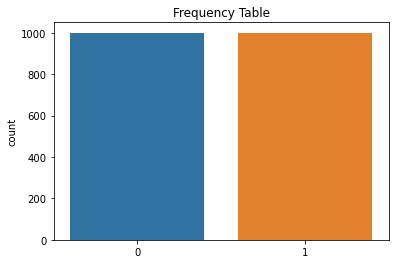

In [7]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()


1). Carry out the data pre-processing:

In [8]:
docs=[]
for i in range(len(my_docs)):
    docs.append(my_docs[i].lower())

In [9]:
len(docs)

2000

Tekonization :

In [10]:
sents=[]
for i in range(len(docs)):
    sents.append(nltk.sent_tokenize(docs[i]))

In [11]:
sents[0][0]

"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse ."

In [12]:
words=[]
for i in range (len(sents)):
    word=[]
    for j in range(len(sents[i])):
        word.append(sents[i][j].split(" "))
    words.append(word)

In [13]:
print(words[0][0])

['arnold', 'schwarzenegger', 'has', 'been', 'an', 'icon', 'for', 'action', 'enthusiasts', ',', 'since', 'the', 'late', "80's", ',', 'but', 'lately', 'his', 'films', 'have', 'been', 'very', 'sloppy', 'and', 'the', 'one-liners', 'are', 'getting', 'worse', '.']


Stemming :

In [14]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [15]:
for i in range(len(words)):
    for j in range(len(words[i])):
            words[i][j]=[porter.stem (x) for x in words[i][j]]

In [16]:
words[0][0]

['arnold',
 'schwarzenegg',
 'ha',
 'been',
 'an',
 'icon',
 'for',
 'action',
 'enthusiast',
 ',',
 'sinc',
 'the',
 'late',
 "80'",
 ',',
 'but',
 'late',
 'hi',
 'film',
 'have',
 'been',
 'veri',
 'sloppi',
 'and',
 'the',
 'one-lin',
 'are',
 'get',
 'wors',
 '.']

Assamblng words back to sentences and texts :

In [17]:
#joining words back to sentences
sentences=[]
for i in range (len(words)):
    sentence=[]
    for j in range(len(words[i])):
        sentence.append(" ".join(words[i][j]))
    sentences.append(sentence)      

In [18]:
sentences[0][0]

"arnold schwarzenegg ha been an icon for action enthusiast , sinc the late 80' , but late hi film have been veri sloppi and the one-lin are get wors ."

In [19]:
document=[]
for i in range(len(sentences)):
    a=" ".join(sentences[i])
    document.append(a)

In [20]:
document[0]

"arnold schwarzenegg ha been an icon for action enthusiast , sinc the late 80' , but late hi film have been veri sloppi and the one-lin are get wors . it' hard see arnold as mr . freez in batman and robin , especi when he say ton of ice joke , but hey he got 15 million , what' it matter to him ? onc again arnold ha sign to do anoth expens blockbust , that can't compar with the like of the termin seri , true lie and even eras . in thi so call dark thriller , the devil ( gabriel byrn ) ha come upon earth , to impregn a woman ( robin tunney ) which happen everi 1000 year , and basic destroy the world , but appar god ha chosen one man , and that one man is jericho cane ( arnold himself ) . with the help of a trusti sidekick ( kevin pollack ) , they will stop at noth to let the devil take over the world ! part of thi are actual so absurd , that they would fit right in with dogma . ye , the film is that weak , but it' better than the other blockbust right now ( sleepi hollow ) , but it make 

Stopword removal :

In [21]:
def cleantxt(txt):

    # collecting english stop words from nltk-library
    stpw = stopwords.words('english')
    
    # Adding custom stop-words
    stpw.extend(['www','http','utc'])
    stpw = set(stpw)
    
    # using regex to clean the text
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt


In [22]:
for i in range(len(document)):
    document[i]=cleantxt(document[i])

In [23]:
document[0]

'arnold schwarzenegg icon action enthusiast sinc late late film veri sloppi wors hard arnold freez batman robin especi joke million matter arnold sign anoth expens blockbust compar like termin seri true even eras call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi year basic destroy world appar chosen jericho cane arnold help trusti sidekick kevin pollack stop noth devil take world part actual absurd would right dogma film weak better blockbust right sleepi hollow make world enough look like star film anyway definit seem like arnold movi type film sure gave chuckl well known seem confus charact film understand especi chang accord sourc asid form still walk much like past film sorri arnold mayb action speak action film hardli explos fight devil made place explod arnold kick devil butt chang make spiritu undoubtedli ruin film least hope cool noth occur also know film took long cost much realli super affect unless consid invis devil minut worth ov

In [43]:
# split for cross-validation (train-60%, validation 20% and test 20%)
X_train, X_test, y_train, y_test = train_test_split(document, y, test_size=0.4, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

2). Create a TF IDF representation.

In [44]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')
train_tfidf = vect.fit_transform(X_train)
val_tfidf = vect.transform(X_val)
test_tfidf = vect.transform(X_test)

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(decode_error='ignore',stop_words='english')
train_dtm=vect.fit_transform(X_train)
train_dtm

<1200x21170 sparse matrix of type '<class 'numpy.int64'>'
	with 250120 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01)
nb.fit(train_dtm, y_train)

MultinomialNB(alpha=0.01)

In [47]:
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

MultinomialNB(alpha=0.01)

In [48]:
y_pred_nb = nb.predict(train_dtm)

In [49]:

from sklearn import metrics
nbAcc=metrics.accuracy_score(y_train, y_pred_nb)
nbAcc 

0.9966666666666667